In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold

In [2]:
spectra = pd.read_csv('spectra.dat', delimiter=' ', header=None)
wavelengths = pd.read_csv('wavelengths.csv', header=None)
galaxy_properties = pd.read_csv('galaxy_properties.csv', index_col = 0)
tauGyr = galaxy_properties['tauGyr']

In [3]:

random.seed() # for reproducibility
rows = [random.randint(0, len(spectra)) for i in range(3)]  # select three random galaxy spectrums to visualize


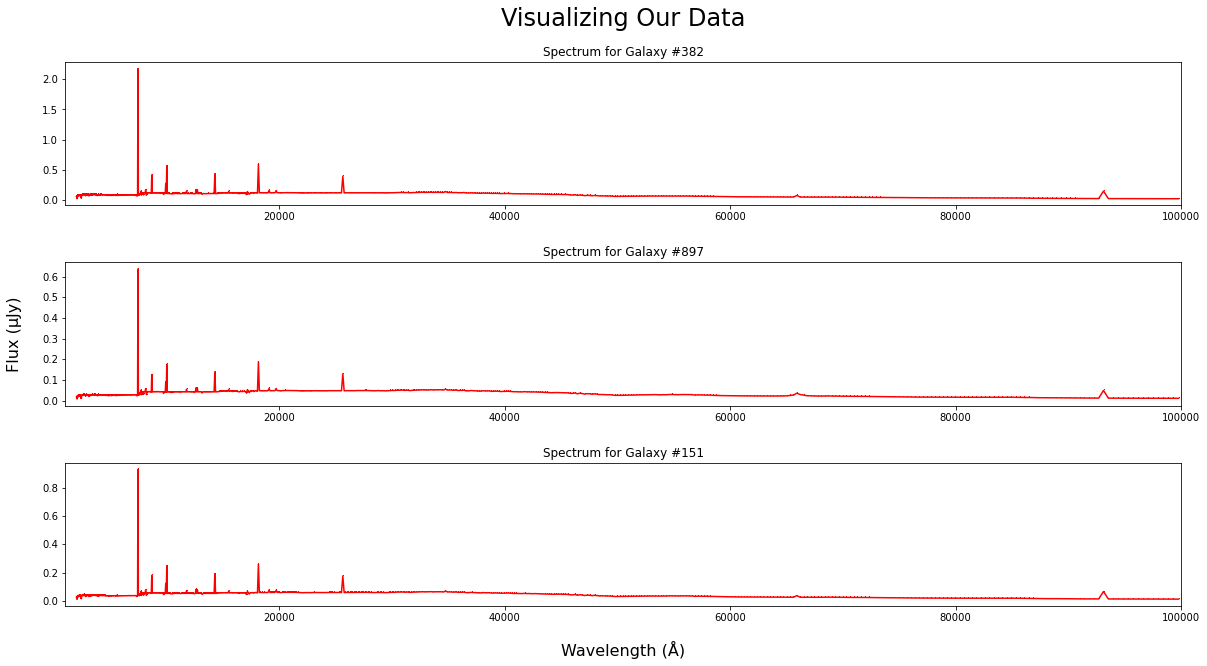

In [4]:

plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()
ax = fig.add_subplot(111) # Generating subplots for our figure; see https://stackoverflow.com/a/6981055/3135556
ax1 = fig.add_subplot(311) # 3 rows, 1 column, plot at position 1
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.plot(wavelengths, spectra.loc[rows[0]], 'r,-')
ax2.plot(wavelengths, spectra.loc[rows[1]], 'r,-')
ax3.plot(wavelengths, spectra.loc[rows[2]], 'r,-')

ax1.set_xlim(1000, 100000) # restrict the x-axis to mitigate the gap that exists around x=0
ax2.set_xlim(1000, 100000)
ax3.set_xlim(1000, 100000)

# Set common labels
ax.set_xlabel("Wavelength (Å)", fontsize=16, labelpad=18)
ax.set_ylabel("Flux (μJy)", fontsize=16, labelpad=20)
ax.set_title("Visualizing Our Data", fontsize=24, pad=36)

ax1.set_title("Spectrum for Galaxy #" + str(rows[0]))
ax2.set_title("Spectrum for Galaxy #" + str(rows[1]))
ax3.set_title("Spectrum for Galaxy #" + str(rows[2]))

plt.subplots_adjust(hspace=0.4) # increase vertical distance between subplots

In [5]:
wavelengths

,0
0,1995.952
1,2005.169
2,2014.430
3,2023.732
4,2033.078
...,...
845,97947.983
846,98400.317
847,98854.740
848,99311.262


In [6]:
tauGyr

0      0.033035
1      0.087146
2      1.273974
3      0.242588
4      0.510683
         ...   
995    2.069916
996    0.062845
997    0.918643
998    0.168273
999    3.523973
Name: tauGyr, Length: 1000, dtype: float64

Text(0, 0.5, 'Tau (Giga Years)')

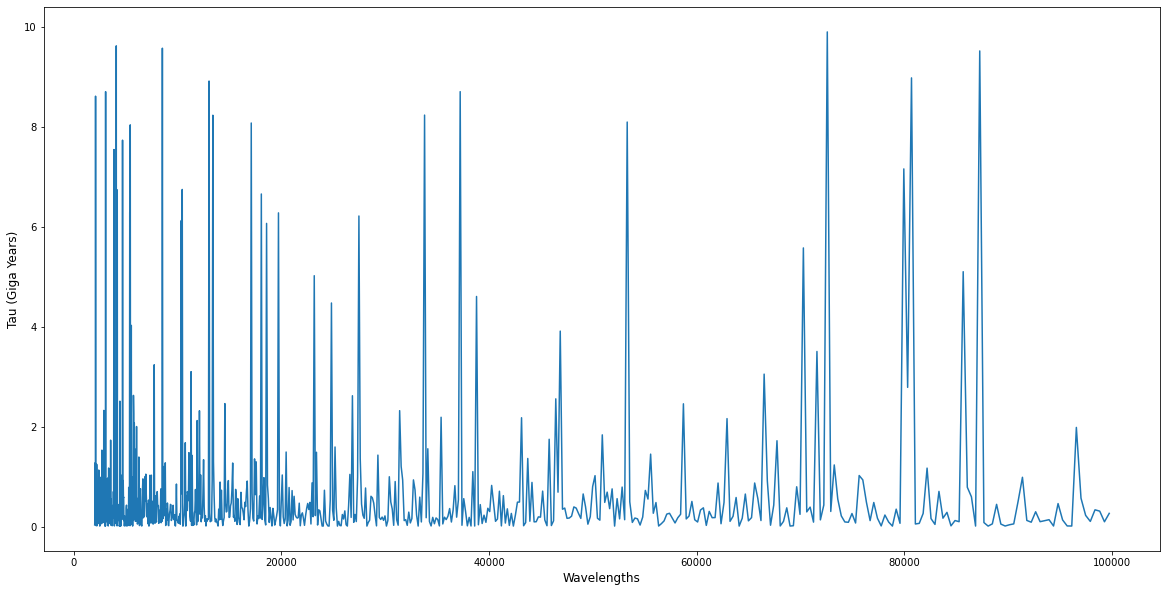

In [7]:
plt.plot(wavelengths, tauGyr[0:850])
plt.xlabel('Wavelengths', fontsize = 12)
plt.ylabel('Tau (Giga Years)', fontsize = 12)


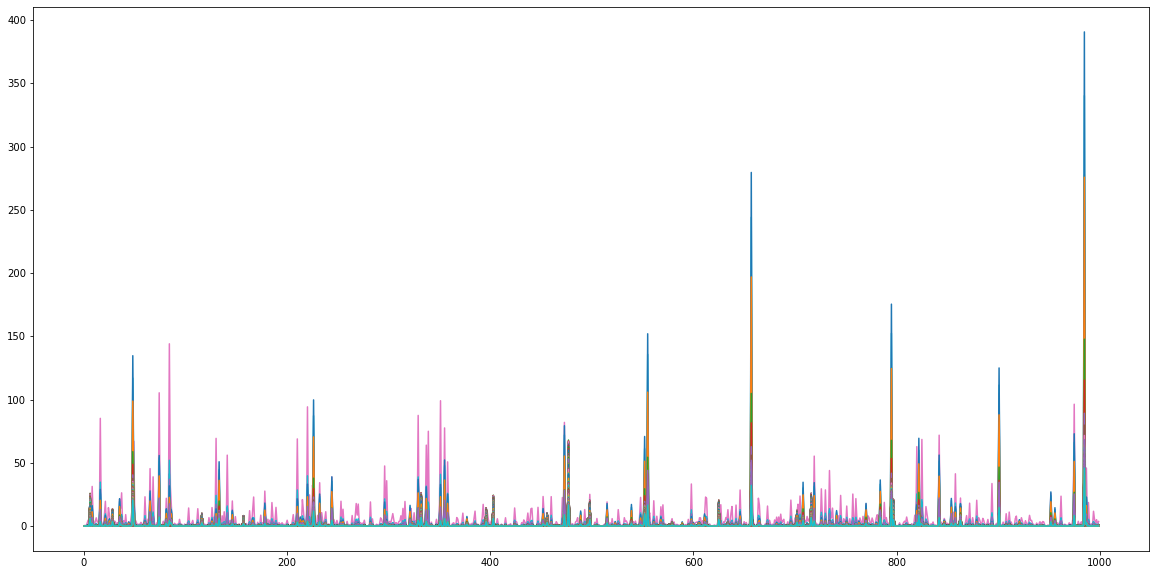

In [8]:
plt.plot(spectra, label = 'Inline Label');

In [9]:
X = np.array((spectra), dtype = np.float)
Y = np.array((tauGyr), dtype = np.float)

In [55]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, train_size=0.65,test_size=0.35, random_state=101)


Text(0.5, 1.0, 'TauyGyr Model')

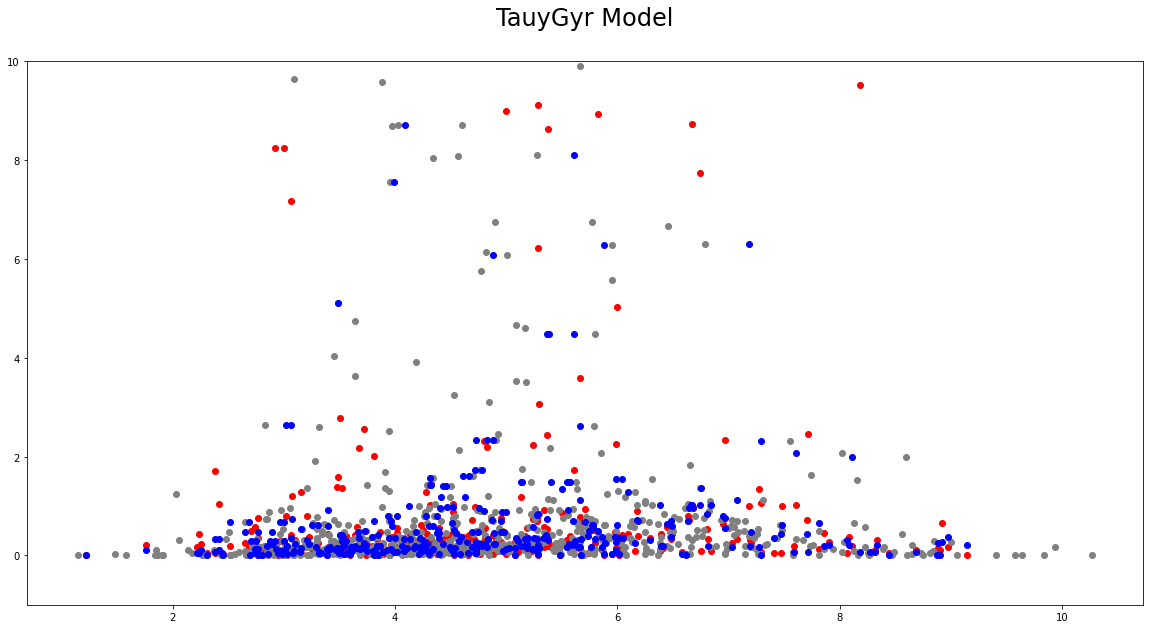

In [58]:
from sklearn.tree import DecisionTreeRegressor

tauGyr_model = DecisionTreeRegressor(max_features=800)
tauGyr_model.fit(X_train, y_train)
prediction = tauGyr_model.predict(X_test)

X_1 = np.empty(len(X_test))
X_2 = np.empty(len(X_train))

for i in range(len(X_test)):
    X_1[i] = np.log(np.sum(X_test[i]))   
for i in range(len(X_train)):
    X_2[i] = np.log(np.sum(X_train[i]))

plt.ylim(-1, 10)
plt.scatter(X_1, y_test, c='red')
plt.scatter(X_2, y_train, c='grey')
plt.scatter(X_1, prediction, c='blue')
plt.title("TauyGyr Model", fontsize=24, pad=36)

In [57]:
print(r2_score(y_test, tauGyr_model.predict(X_test)))
print(mean_squared_error(y_test, tauGyr_model.predict(X_test)))

-0.25612098839335484
2.8427337923882243


In [59]:
import scipy.stats

def add_noise(df, percent):
    """
    Add a percetange of noise to a Pandas DataFrame.
    Returns a new Pandas DataFrame containing the noise.
    
    Positional arguments:
    - df : a Pandas DataFrame
    - percent: percentage of noise desired, as a float. 
               For example, a value of 0.10 is 10%. 
               Similarly a value of 1.15 is 115%. 
    """
    ndf = pd.DataFrame()
    for i in range(len(df.columns)):
        mean = df[i] * percent
        gauss_dist = scipy.stats.norm.rvs(loc=mean, scale=0.000001, size=1000)
        ndf[i] = df[i] + gauss_dist
        
    return ndf

In [60]:
# Adding three different percentages of noise to our data
spectra_1 = add_noise(spectra, 0.01)
spectra_5 = add_noise(spectra, 0.05)
spectra_10 = add_noise(spectra, 0.1)


In [62]:
X_1per = np.array((spectra_1), dtype = np.float)
X_5per = np.array((spectra_5), dtype = np.float)
X_10per = np.array((spectra_10), dtype = np.float)

In [66]:
X_train_1per, X_test_1per, y_train, y_test = model_selection.train_test_split(X_1per, Y, train_size=0.65,test_size=0.35, random_state=101)
X_train_5per, X_test_5per, y_train, y_test = model_selection.train_test_split(X_5per, Y, train_size=0.65,test_size=0.35, random_state=101)
X_train_10per, X_test_10per, y_train, y_test = model_selection.train_test_split(X_10per, Y, train_size=0.65,test_size=0.35, random_state=101)

Text(0.5, 1.0, 'TauyGyr Model, 1% noise added')

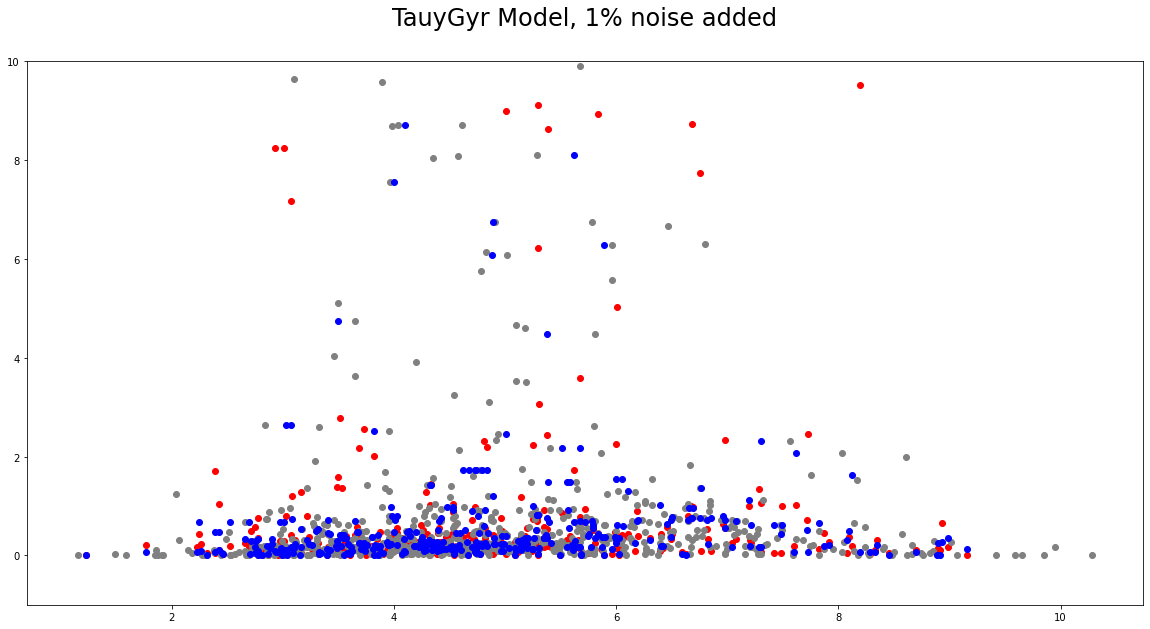

In [77]:
tauGyr_model_1per = DecisionTreeRegressor(max_features=800)
tauGyr_model_1per.fit(X_train_1per, y_train)
prediction_1per = tauGyr_model_1per.predict(X_test_1per)

X_1 = np.empty(len(X_test_1per))
X_2 = np.empty(len(X_train_1per))

for i in range(len(X_test_1per)):
    X_1[i] = np.log(np.sum(X_test_1per[i]))   
for i in range(len(X_train_1per)):
    X_2[i] = np.log(np.sum(X_train_1per[i]))

plt.ylim(-1, 10)
plt.scatter(X_1, y_test, c='red')
plt.scatter(X_2, y_train, c='grey')
plt.scatter(X_1, prediction_1per, c='blue')
plt.title("TauyGyr Model, 1% noise added", fontsize=24, pad=36)

Text(0.5, 1.0, 'TauyGyr Model, 5% noise added')

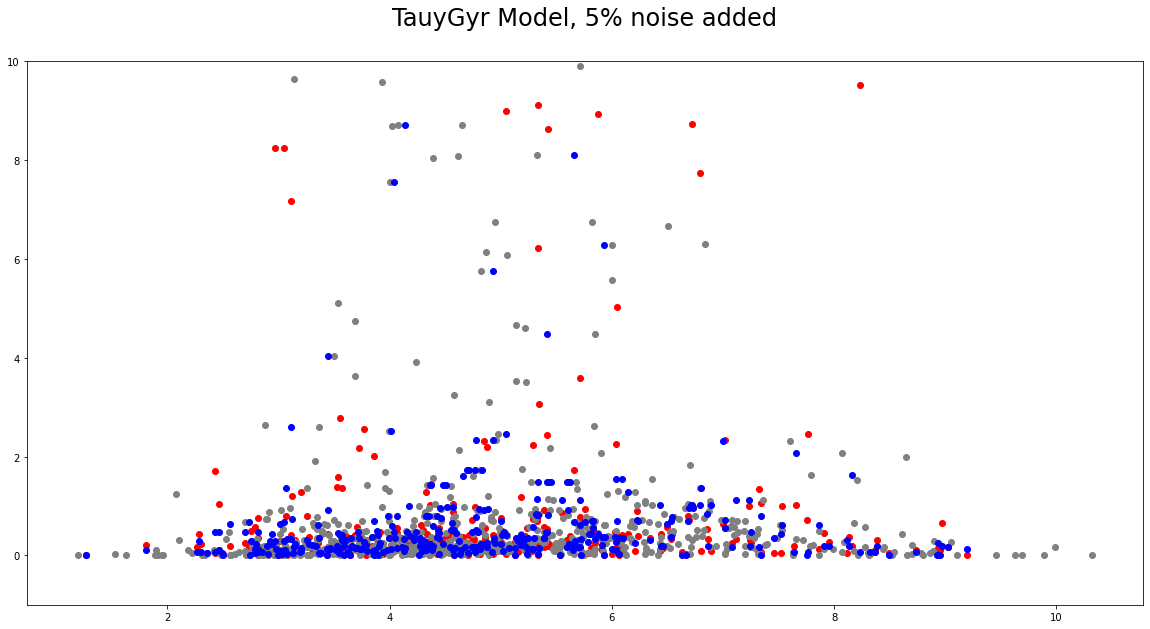

In [78]:
tauGyr_model_5per = DecisionTreeRegressor(max_features=800)
tauGyr_model_5per.fit(X_train_5per, y_train)
prediction_5per = tauGyr_model_5per.predict(X_test_5per)

X_1 = np.empty(len(X_test_5per))
X_2 = np.empty(len(X_train_5per))

for i in range(len(X_test_5per)):
    X_1[i] = np.log(np.sum(X_test_5per[i]))   
for i in range(len(X_train_5per)):
    X_2[i] = np.log(np.sum(X_train_5per[i]))

plt.ylim(-1, 10)
plt.scatter(X_1, y_test, c='red')
plt.scatter(X_2, y_train, c='grey')
plt.scatter(X_1, prediction_5per, c='blue')
plt.title("TauyGyr Model, 5% noise added", fontsize=24, pad=36)

Text(0.5, 1.0, 'TauyGyr Model, 10% noise added')

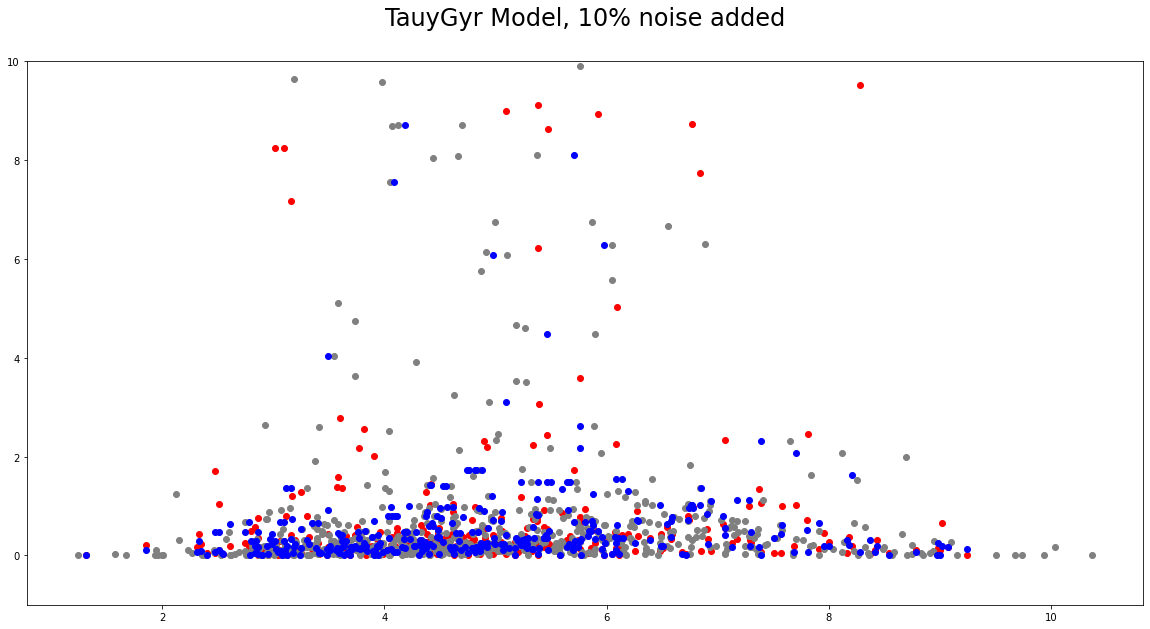

In [79]:
tauGyr_model_10per = DecisionTreeRegressor(max_features=800)
tauGyr_model_10per.fit(X_train_10per, y_train)
prediction_10per = tauGyr_model_10per.predict(X_test_10per)

X_1 = np.empty(len(X_test_10per))
X_2 = np.empty(len(X_train_10per))

for i in range(len(X_test_10per)):
    X_1[i] = np.log(np.sum(X_test_10per[i]))   
for i in range(len(X_train_1per)):
    X_2[i] = np.log(np.sum(X_train_10per[i]))

plt.ylim(-1, 10)
plt.scatter(X_1, y_test, c='red')
plt.scatter(X_2, y_train, c='grey')
plt.scatter(X_1, prediction_10per, c='blue')
plt.title("TauyGyr Model, 10% noise added", fontsize=24, pad=36)

## Original Model

In [80]:
print(r2_score(y_test, tauGyr_model.predict(X_test)))
print(mean_squared_error(y_test, tauGyr_model.predict(X_test)))

-0.4306301963014587
3.237666467653675


## At 1% noise

In [81]:
print(r2_score(y_test, tauGyr_model_1per.predict(X_test_1per)))
print(mean_squared_error(y_test, tauGyr_model_1per.predict(X_test_1per)))

-0.37552151649682286
3.112949734327758


## At 5% noise

In [82]:
print(r2_score(y_test, tauGyr_model_5per.predict(X_test_5per)))
print(mean_squared_error(y_test, tauGyr_model_5per.predict(X_test_5per)))

-0.3312497574875455
3.0127580915266035


## At 10% noise

In [83]:
print(r2_score(y_test, tauGyr_model_10per.predict(X_test_10per)))
print(mean_squared_error(y_test, tauGyr_model_10per.predict(X_test_10per)))

-0.36717050056969036
3.0940505077435447


In [75]:
galaxy_properties

,dust_av,age,mass,tauGyr
0,0.164869,0.203291,7.885367,0.033035
1,0.200852,0.470248,8.297678,0.087146
2,0.197863,4.033993,8.184615,1.273974
3,0.001000,0.721636,8.360110,0.242588
4,0.001000,0.699464,8.373327,0.510683
...,...,...,...,...
995,0.322905,2.018232,8.987870,2.069916
996,0.870794,0.075134,7.607796,0.062845
997,0.001000,0.849640,8.415094,0.918643
998,0.232163,0.586724,8.286425,0.168273
